# Задание 1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from tqdm import tqdm

In [ ]:
data_all = pd.read_csv('/content/drive/MyDrive/Базы/Task1.csv')
data_all.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


## Подготовим данные

In [ ]:
# удаляем не нужные столбцы
data_all = data_all.drop(data_all.columns[:3], axis=1)
data_all.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [ ]:
# приведем страну и возраст к категориальным значениям
country_list = ['France', 'Spain', 'Germany']
gender_list = ['Female', 'Male']
def text2category(df):
  global country_list
  global gender_list
  # df['Geography'] = country_list.index(df['Geography'])
  df['Gender'] = gender_list.index(df['Gender'])
  return df
data_all = data_all.apply(text2category, axis=1)

In [ ]:
data_all = pd.get_dummies(data_all, columns=['Geography'])

In [ ]:
data_all.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2.0,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1.0,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8.0,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1.0,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2.0,125510.82,1,1,1,79084.10,0,0,0,1


In [ ]:
def age2category(age):
  if age <= 23:
    return 0
  if age <= 30:
    return 1
  if age <= 45:
    return 2
  if age <= 55:
    return 3
  return 4

data_all['Age'] = data_all['Age'].apply(age2category)
data_all.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,2,2.0,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,2,1.0,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,2,8.0,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,2,1.0,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,2,2.0,125510.82,1,1,1,79084.10,0,0,0,1


In [ ]:
from sklearn.preprocessing import normalize

data_all['CreditScore'] = normalize(data_all['CreditScore'].values.reshape(1, -1)).flatten()
data_all['Balance'] = normalize(data_all['Balance'].values.reshape(1, -1)).flatten()
data_all['EstimatedSalary'] = normalize(data_all['EstimatedSalary'].values.reshape(1, -1)).flatten()

In [ ]:
data_all.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.009412,0,2,2.0,0.000000,1,1,1,0.008780,1,1,0,0
1,0.009245,0,2,1.0,0.008491,1,0,1,0.009749,0,0,0,1
2,0.007633,0,2,8.0,0.016175,3,1,0,0.009870,1,1,0,0
3,0.010628,0,2,1.0,0.000000,2,0,0,0.008128,0,1,0,0
4,0.012924,0,2,2.0,0.012715,1,1,1,0.006851,0,0,0,1


In [ ]:
# посмотрим, как коррелируют наши значения
data_all.corr()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
CreditScore,1.000000,-0.002857,-0.006824,-0.000062,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,-0.008928,0.005538,0.004780
Gender,-0.002857,1.000000,-0.026644,0.012634,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512,0.006772,-0.024628,0.016889
Age,-0.006824,-0.026644,1.000000,-0.016451,0.030257,-0.033275,-0.003566,0.076600,-0.013158,0.274233,-0.034574,0.040163,-0.000290
Tenure,-0.000062,0.012634,-0.016451,1.000000,-0.007911,0.011979,0.027232,-0.032178,0.010520,-0.016761,0.002167,-0.003299,0.000810
Balance,0.006268,0.012087,0.030257,-0.007911,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,-0.231329,0.401110,-0.134892
NumOfProducts,0.012238,-0.021859,-0.033275,0.011979,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,0.001230,-0.010419,0.009039
HasCrCard,-0.005458,0.005766,-0.003566,0.027232,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.002467,0.010577,-0.013480
IsActiveMember,0.025651,0.022544,0.076600,-0.032178,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,0.003317,-0.020486,0.016732
EstimatedSalary,-0.001384,-0.008112,-0.013158,0.010520,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,-0.003332,0.010297,-0.006482
Exited,-0.027094,-0.106512,0.274233,-0.016761,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,-0.104955,0.173488,-0.052667


In [ ]:
data_all.columns[[0, 3, 6, 8]]

Index(['CreditScore', 'Tenure', 'HasCrCard', 'EstimatedSalary'], dtype='object')

In [ ]:
data = data_all.drop(data_all.columns[[0, 3, 6, 8]], axis=1)

In [ ]:
# проверяем, насколько наши данные сбалансированны
print('Количество ушедших:', data[data['Exited'] == 1].shape[0])
print('Количество оставшихся:', data[data['Exited'] == 0].shape[0])

Количество ушедших: 2037
Количество оставшихся: 7963


In [ ]:
# проверим на пропуски
data.isna().sum()

Gender               0
Age                  0
Balance              0
NumOfProducts        0
IsActiveMember       0
Exited               0
Geography_France     0
Geography_Germany    0
Geography_Spain      0
dtype: int64

In [ ]:
data = data.fillna(0)
data.isna().sum()

Gender               0
Age                  0
Balance              0
NumOfProducts        0
IsActiveMember       0
Exited               0
Geography_France     0
Geography_Germany    0
Geography_Spain      0
dtype: int64

In [ ]:
# делим на train и test
x, y = data.drop(data.columns[-4], axis=1), data[data.columns[-4]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=False)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7000, 8)
(7000,)
(3000, 8)
(3000,)


## KNeighborsClassifier

In [ ]:
f1 = []
acc = []
for i in range(1, 101):
  model = KNeighborsClassifier(i, weights='distance')
  model.fit(x_train, y_train)
  predict = model.predict(x_test).round()
  f1.append(f1_score(y_test, predict, average='binary'))
  acc.append(accuracy_score(y_test, predict))
  # print('f1:', f1_score(y_test, predict, average='binary'))
  # print('accuracy:', accuracy_score(y_test, predict))

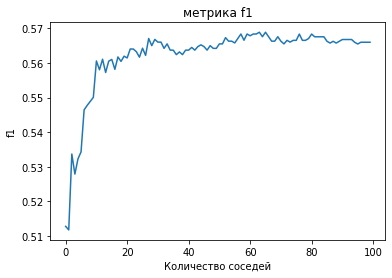

In [ ]:
plt.plot(f1)
plt.xlabel('Количество соседей')
plt.ylabel('f1')
plt.title('метрика f1')
plt.show()

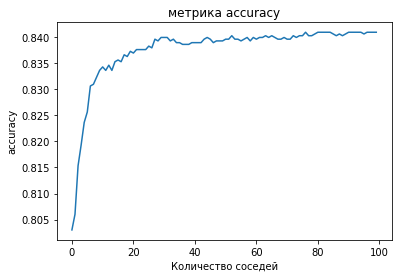

In [ ]:
plt.plot(acc)
plt.xlabel('Количество соседей')
plt.ylabel('accuracy')
plt.title('метрика accuracy')
plt.show()

In [ ]:
print(f1.index(max(f1)))
print(max(f1))

63
0.5688568856885688


### Максимально значение F1 при 64 соседях

In [ ]:
model = KNeighborsClassifier(f1.index(max(f1))+1, weights='distance')
model.fit(x_train, y_train)
predict = model.predict(x_test)
print('f1:', f1_score(y_test, predict, average='binary'))
print('accuracy:', accuracy_score(y_test, predict))

f1: 0.5688568856885688
accuracy: 0.8403333333333334


## DecisionTreeClassifier

In [ ]:
f1 = []
acc = []
for i in range(1, 101):
  model = DecisionTreeClassifier(criterion="entropy", max_depth=i, class_weight={0:0.4, 1:1})
  model.fit(x_train, y_train)
  predict = model.predict(x_test).round()
  f1.append(f1_score(y_test, predict, average='binary'))
  acc.append(accuracy_score(y_test, predict))
  # print('f1:', f1_score(y_test, predict, average='binary'))
  # print('accuracy:', accuracy_score(y_test, predict))

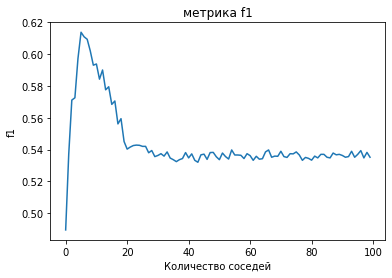

In [ ]:
plt.plot(f1)
plt.xlabel('Количество соседей')
plt.ylabel('f1')
plt.title('метрика f1')
plt.show()

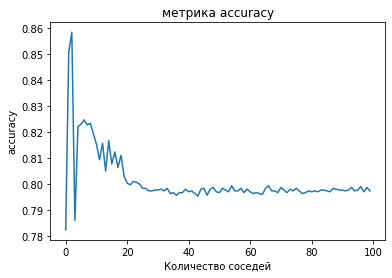

In [ ]:
plt.plot(acc)
plt.xlabel('Количество соседей')
plt.ylabel('accuracy')
plt.title('метрика accuracy')
plt.show()

In [ ]:
print(f1.index(max(f1)))
print(max(f1))

5
0.6138181818181818


### Максимальное значение F1 при глубине дерева 7

In [ ]:
model = DecisionTreeClassifier(criterion="entropy", max_depth=f1.index(max(f1))+1, class_weight={0:0.4, 1:1})
model.fit(x_train, y_train)
predict = model.predict(x_test)
print('f1:', f1_score(y_test, predict, average='binary'))
print('accuracy:', accuracy_score(y_test, predict))

f1: 0.6138181818181818
accuracy: 0.823


## RandomForestClassifier

In [ ]:
f1 = []
acc = []
for i in range(1, 101):
  model = RandomForestClassifier(criterion="entropy", max_depth=i, class_weight={0:0.4, 1:1})
  model.fit(x_train, y_train)
  predict = model.predict(x_test).round()
  f1.append(f1_score(y_test, predict, average='binary'))
  acc.append(accuracy_score(y_test, predict))
  # print('f1:', f1_score(y_test, predict, average='binary'))
  # print('accuracy:', accuracy_score(y_test, predict))

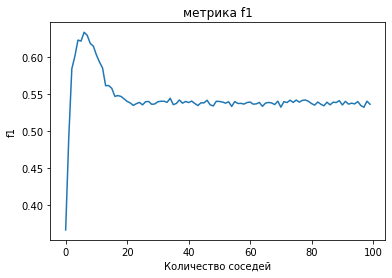

In [ ]:
plt.plot(f1)
plt.xlabel('Количество соседей')
plt.ylabel('f1')
plt.title('метрика f1')
plt.show()

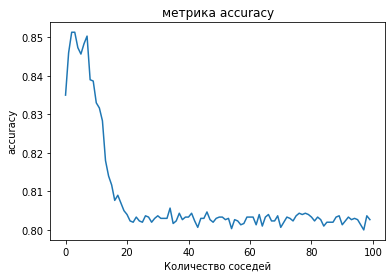

In [ ]:
plt.plot(acc)
plt.xlabel('Количество соседей')
plt.ylabel('accuracy')
plt.title('метрика accuracy')
plt.show()

In [ ]:
print(f1.index(max(f1)))
print(max(f1))

6
0.6333601933924256


### Максимальное значение F1 при глубине дерева 7

In [ ]:
model = RandomForestClassifier(criterion="entropy", max_depth=f1.index(max(f1))+1, class_weight={0:0.4, 1:1})
model.fit(x_train, y_train)
predict = model.predict(x_test)
print('f1:', f1_score(y_test, predict, average='binary'))
print('accuracy:', accuracy_score(y_test, predict))

f1: 0.6311407160699418
accuracy: 0.8523333333333334


## GradientBoostingClassifier

In [ ]:
f1 = []
acc = []
for i in tqdm(range(1, 101)):
  model = GradientBoostingClassifier(loss='exponential',
                                     learning_rate=0.89,
                                     n_estimators=i,
                                     max_depth=16)
  model.fit(x_train, y_train)
  predict = model.predict(x_test).round()
  f1.append(f1_score(y_test, predict, average='binary'))
  acc.append(accuracy_score(y_test, predict))
  # print('f1:', f1_score(y_test, predict, average='binary'))
  # print('accuracy:', accuracy_score(y_test, predict))

100%|██████████| 100/100 [02:40<00:00,  1.61s/it]


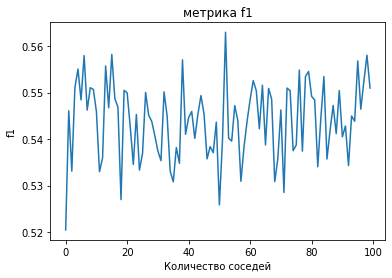

In [ ]:
plt.plot(f1)
plt.xlabel('Количество соседей')
plt.ylabel('f1')
plt.title('метрика f1')
plt.show()

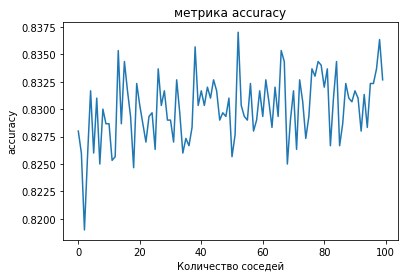

In [ ]:
plt.plot(acc)
plt.xlabel('Количество соседей')
plt.ylabel('accuracy')
plt.title('метрика accuracy')
plt.show()

In [ ]:
print(f1.index(max(f1)))
print(max(f1))

52
0.5630026809651475


### Максимальное значение F1 при глубине дерева 7

In [ ]:
model = GradientBoostingClassifier(loss='exponential',
                                    learning_rate=0.88,
                                    n_estimators=f1.index(max(f1))+1,
                                    max_depth=16)
model.fit(x_train, y_train)
predict = model.predict(x_test).round()
print('f1:', f1_score(y_test, predict, average='binary'))
print('accuracy:', accuracy_score(y_test, predict))

f1: 0.5448092280390416
accuracy: 0.829


## Нейронка

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, Input, Conv1D, MaxPool1D, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.models import Sequential

neural_model = Sequential([
                           Input(shape=(x_train.shape[1],1)),
                           Conv1D(16, 3, padding='same', activation='relu'),
                           Dropout(0.2),
                           MaxPool1D((1,)),
                           Conv1D(32, 3, padding='same', activation='relu'),
                           Dropout(0.2),
                           MaxPool1D((1,)),
                           Flatten(),
                           Dense(32, activation='relu'),
                           Dropout(0.2),
                           Dense(16, activation='relu'),
                           Dropout(0.2),
                           Dense(1, activation='sigmoid')
])


In [ ]:
neural_model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_50 (Conv1D)           (None, 9, 16)             64        
_________________________________________________________________
dropout_76 (Dropout)         (None, 9, 16)             0         
_________________________________________________________________
max_pooling1d_50 (MaxPooling (None, 9, 16)             0         
_________________________________________________________________
conv1d_51 (Conv1D)           (None, 9, 32)             1568      
_________________________________________________________________
dropout_77 (Dropout)         (None, 9, 32)             0         
_________________________________________________________________
max_pooling1d_51 (MaxPooling (None, 9, 32)             0         
_________________________________________________________________
flatten_25 (Flatten)         (None, 288)             

In [ ]:


neural_model.compile(
    optimizer=Adam(lr=1e-2),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

neural_model.fit(x_train.values[...,None], y_train, epochs=10, validation_data=(x_test.values[...,None], y_test))

neural_model.compile(
    optimizer=Adam(lr=1e-3),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

neural_model.fit(x_train.values[...,None], y_train, epochs=10, validation_data=(x_test.values[...,None], y_test))

neural_model.compile(
    optimizer=Adam(lr=9e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

neural_model.fit(x_train.values[...,None], y_train, epochs=10, validation_data=(x_test.values[...,None], y_test))

# neural_model.compile(
#     optimizer=RMSprop(lr=1e-5),
#     loss='binary_crossentropy',
#     metrics=['accuracy']
# )

# neural_model.fit(x_train.values[...,None], y_train, epochs=15, validation_data=(x_test.values[...,None], y_test))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


219/219 [==============================] - 2s 5ms/step - loss: 0.4768 - accuracy: 0.7960 - val_loss: 0.4381 - val_accuracy: 0.7930
Epoch 2/10
219/219 [==============================] - 1s 4ms/step - loss: 0.4356 - accuracy: 0.8123 - val_loss: 0.3845 - val_accuracy: 0.8467
Epoch 3/10
219/219 [==============================] - 1s 5ms/step - loss: 0.4180 - accuracy: 0.8211 - val_loss: 0.3702 - val_accuracy: 0.8507
Epoch 4/10
219/219 [==============================] - 1s 4ms/step - loss: 0.4150 - accuracy: 0.8247 - val_loss: 0.3898 - val_accuracy: 0.8183
Epoch 5/10
219/219 [==============================] - 1s 4ms/step - loss: 0.4103 - accuracy: 0.8273 - val_loss: 0.3903 - val_accuracy: 0.8517
Epoch 6/10
219/219 [==============================] - 1s 4ms/step - loss: 0.4068 - accuracy: 0.8310 - val_loss: 0.3685 - val_accuracy: 0.8560
Epoch 7/10
219/219 [==============================] - 1s 4ms/step - loss: 0.4044 - accuracy: 0.8306 - val_loss: 0.3729 - val_accuracy: 0.8507
Epoch 8/10
219/21

In [ ]:
predict = neural_model.predict(x_test.values[...,None]).round().flatten()

In [ ]:
print('f1:', f1_score(y_test, predict, average='binary'))
print('accuracy:', accuracy_score(y_test, predict))

f1: 0.573982125124131
accuracy: 0.857
